# Depression in Retirement: Unraveling the Silent Epidemic through SHARE Data Analysis

##Introduction

Depression remains a pervasive mental health challenge that significantly affects people across Europe. Recent studies, including those by Wu and colleagues (2020), have established depression as a major public health issue, with its prevalence particularly noted in developed countries. It is projected to become the leading cause of disability by 2030, illustrating a critical concern for public health systems and economic stability. Beyond its financial implications, depression severely deteriorates the quality of life, increases the risk of premature mortality, and is frequently comorbid with other serious health conditions, including dementia.

This report utilizes data from the Survey of Health, Ageing and Retirement in Europe (SHARE) to examine the prevalence and determinants of depression among retirees. Among others, SHARE data includes a “gv_imputations” module, which plays a crucial role in addressing and correcting item non-response errors in the dataset. Specifically, this module is utilized to implement multiple imputation techniques for missing data in Wave 9 of the Survey of Health, Ageing and Retirement in Europe (SHARE).

In the realm of artificial intelligence, neural networks have emerged as a pivotal technology, revolutionizing fields ranging from computer vision to natural language processing. Modeled after the human brain, neural networks are computational models composed of interconnected nodes, or neurons, that process information and learn from data. Over the years, advancements in hardware and algorithms have significantly enhanced their capability to solve complex problems that were once thought to be beyond the reach of machines.

## Literature review

Pascual-Sáez et al. (2019) explore the factors affecting quality of life, finding that an individual’s quality of life is greatly influenced by their partner's mental health, self-perceived health, educational attainment, employment status, urban living, and residing in Mediterranean countries.

Acciai and Hardy (2017) summarize findings that women consistently report more depressive symptoms than men, a trend that persists across all measured forms of depression and is common throughout Europe, the U.S., and Japan. Moreover, this gender disparity exists in all 23 tested European countries among adults with significant variation in the degree of this gap across different nations (Van de Velde et al., 2010).

Paszke et al. (2019) introduce PyTorch and discuss its design principles and features, including how to define and train neural networks. The paper details the implementation of PyTorch and how it is reflected in the architecture.

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the paths to the files on Google Drive
data_frames_path = '/content/drive/My Drive/NN project/data_frames.pkl'
variable_labels_path = '/content/drive/My Drive/NN project/variable_labels.pkl'

# Load the data frames
import pandas as pd
with open(data_frames_path, 'rb') as f:
    data_frames = pd.read_pickle(f)
with open(variable_labels_path, 'rb') as f:
    loaded_variable_labels = pd.read_pickle(f)

Mounted at /content/drive


In [ ]:
list_of_needed_columns=['mergeid','hhid9','mergeidp9','coupleid9','country','language','eurod','otrf','single','couple','ydip',
                        'yind','thinc2','thinc','thexp','hnetw','hnfass','gender','age','yedu','sphus','mstat','nchild',
                        'ngrchild','gali','chronic','mobility','hospital','cjs','naly','saly','lifesat','lifehap',
                        'bfi10_extra','bfi10_agree','bfi10_consc','bfi10_neuro','bfi10_open','te_children','te_parents',
                        'te_partner','te_family','te_leisure','te_pwork','te_vwork','te_nap','te_sleep']

In [ ]:
df_depression = data_frames['gv_imputations'][list_of_needed_columns].copy()

In [ ]:
df_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347235 entries, 0 to 347234
Data columns (total 47 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   mergeid      347235 non-null  object  
 1   hhid9        347235 non-null  object  
 2   mergeidp9    347235 non-null  object  
 3   coupleid9    347235 non-null  object  
 4   country      347235 non-null  category
 5   language     347235 non-null  category
 6   eurod        347235 non-null  category
 7   otrf         347235 non-null  category
 8   single       347235 non-null  category
 9   couple       347235 non-null  category
 10  ydip         347235 non-null  float64 
 11  yind         347235 non-null  float64 
 12  thinc2       347235 non-null  float64 
 13  thinc        347235 non-null  float64 
 14  thexp        347235 non-null  float64 
 15  hnetw        347235 non-null  float64 
 16  hnfass       347235 non-null  float64 
 17  gender       347235 non-null  category
 18  age 

In [ ]:
# Identify categorical columns. Categorical data are stored as type'category'
categorical_columns = df_depression.select_dtypes(include=['category']).columns
print(categorical_columns)

Index(['country', 'language', 'eurod', 'otrf', 'single', 'couple', 'gender',
       'age', 'yedu', 'sphus', 'mstat', 'nchild', 'ngrchild', 'gali',
       'chronic', 'mobility', 'hospital', 'cjs', 'naly', 'saly', 'lifesat',
       'lifehap', 'bfi10_extra', 'bfi10_agree', 'bfi10_consc', 'bfi10_neuro',
       'bfi10_open', 'te_children', 'te_parents', 'te_partner', 'te_family',
       'te_leisure', 'te_pwork', 'te_vwork', 'te_nap', 'te_sleep'],
      dtype='object')


In [ ]:
# Create an auxiliary table with the number of unique values and the actual unique values
auxiliary_table = pd.DataFrame({
    'Number of Unique Values': df_depression[categorical_columns].nunique(),
    'Unique Values': df_depression[categorical_columns].apply(lambda x: x.dropna().unique())
})

In [ ]:
# Display the auxiliary table
auxiliary_table['Unique Values']

country        ['Austria', 'Bulgaria', 'Belgium', 'Cyprus', '...
language       ['German (at)', 'Bulgarian', 'French (be)', 'F...
eurod          ['Not depressed', 1.0, 2.0, 4.0, 7.0, ..., 6.0...
otrf           ['Owner', 'Tenant', 'Not applicable', 'Rent fr...
single         ['No', 'Yes']
Categories (2, object): ['No', '...
couple         ['Yes', 'No']
Categories (2, object): ['No', '...
gender         ['Male', 'Female']
Categories (2, object): ['F...
age            [58.0, 70.0, 71.0, 60.0, 59.0, ..., 33.0, 36.0...
yedu           [13.0, 11.0, 8.0, 7.0, 9.0, ..., 24.0, 'Never ...
sphus          ['Very good', 'Good', 'Excellent', 'Poor', 'Fa...
mstat          ['Married, living with spouse', 'Widowed', 'Ma...
nchild         [0.0, 6.0, 7.0, 1.0, 9.0, ..., 12.0, 13.0, 17....
ngrchild       [0.0, 13.0, 9.0, 2.0, 19.0, ..., 14.0, 17.0, 1...
gali           ['Not limited', 'Limited']
Categories (2, obje...
chronic        [1.0, 3.0, 4.0, 5.0, 0.0, ..., 9.0, 11.0, 10.0...
mobility       [0.0, 1.0,

In [ ]:
# Replace 'Not applicable' with np.nan across the entire DataFrame
df_depression.replace('Not applicable', np.nan, inplace=True)

In [ ]:
# Count NA values in each column
na_counts = df_depression.isna().sum()

# Display the counts of NA values
print(na_counts)

mergeid            0
hhid9              0
mergeidp9          0
coupleid9          0
country            0
language           0
eurod              0
otrf            3200
single             0
couple             0
ydip               0
yind               0
thinc2             0
thinc              0
thexp              0
hnetw              0
hnfass             0
gender             0
age                0
yedu               0
sphus              0
mstat              0
nchild             0
ngrchild           0
gali               0
chronic            0
mobility           0
hospital           0
cjs             3200
naly            3200
saly            3200
lifesat            0
lifehap            0
bfi10_extra    10330
bfi10_agree    10330
bfi10_consc    10330
bfi10_neuro    10330
bfi10_open     10330
te_children    80980
te_parents     80980
te_partner     80980
te_family      80980
te_leisure     80980
te_pwork       80980
te_vwork       80980
te_nap         80980
te_sleep       80980
dtype: int64


In [ ]:
# Count occurrences of each unique value in the 'cjs' column
value_counts = df_depression['cjs'].value_counts()

# Print the counts
print(value_counts)

cjs
Retired                      225780
Employed or self-employed     75064
Homemaker                     22430
Permanently sick               9115
Unemployed                     6507
Other                          5139
Name: count, dtype: int64


In [ ]:
# Dataset where 'cjs' (current job situation) column value is 'Retired'
df_retired = df_depression[df_depression['cjs'] == 'Retired']
print(df_retired.shape) #(225780, 47)

(225780, 47)


In [ ]:
# Count NA values in each column
na_counts = df_retired.isna().sum()

# Display the counts of NA values
print(na_counts)
print(df_retired.info())

mergeid            0
hhid9              0
mergeidp9          0
coupleid9          0
country            0
language           0
eurod              0
otrf               0
single             0
couple             0
ydip               0
yind               0
thinc2             0
thinc              0
thexp              0
hnetw              0
hnfass             0
gender             0
age                0
yedu               0
sphus              0
mstat              0
nchild             0
ngrchild           0
gali               0
chronic            0
mobility           0
hospital           0
cjs                0
naly               0
saly               0
lifesat            0
lifehap            0
bfi10_extra     7620
bfi10_agree     7620
bfi10_consc     7620
bfi10_neuro     7620
bfi10_open      7620
te_children    37416
te_parents     37416
te_partner     37416
te_family      37416
te_leisure     37416
te_pwork       37416
te_vwork       37416
te_nap         37416
te_sleep       37416
dtype: int64


In [ ]:
# Count the number of respondents by country
country_counts = df_retired['country'].value_counts()
print(country_counts)

country
Poland            17005
Slovenia          15287
Croatia           15041
Czech Republic    13825
Belgium           13446
Estonia           13147
Germany           13045
Austria           11852
France            10818
Italy             10668
Sweden             9595
Greece             8327
Netherlands        7620
Denmark            6636
Finland            6515
Hungary            6509
Switzerland        6372
Romania            5528
Latvia             5170
Spain              4729
Portugal           4421
Lithuania          4380
Slovakia           3555
Bulgaria           2935
Luxembourg         2910
Cyprus             2475
Malta              2036
Israel             1933
Name: count, dtype: int64


## EDA "df_retired"

In [ ]:
# Remove all rows with any missing values in df_retired
df_retired_clean = df_retired.copy()
df_retired_clean = df_retired_clean.dropna()

# Display the shape of the new DataFrame to see the number of remaining rows and columns
print("Cleaned Employed/Etc. Dataset shape:", df_retired_clean.shape) # now: (75444, 47)

Cleaned Employed/Etc. Dataset shape: (181001, 47)


In [ ]:
# Count the number of respondents by country
df_retired_clean['country'] = df_retired_clean['country'].cat.remove_unused_categories()
country_counts = df_retired_clean['country'].value_counts()
print(country_counts)

country
Slovenia          13445
Estonia           13097
Belgium           12719
Czech Republic    11380
Germany           10554
Italy             10338
Austria           10162
Poland             9937
Sweden             9473
France             9468
Croatia            8337
Greece             8229
Denmark            6601
Switzerland        6267
Hungary            5440
Spain              4535
Romania            4055
Portugal           4045
Lithuania          3835
Latvia             3235
Finland            3125
Slovakia           2970
Luxembourg         2800
Bulgaria           2365
Israel             1818
Malta              1511
Cyprus             1260
Name: count, dtype: int64


<ipython-input-17-908f76dbde7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired_clean['country'] = df_retired_clean['country'].cat.remove_unused_categories()


In [ ]:
# Count occurrences of each unique value in the 'euro3' column
value_counts = df_retired_clean['eurod'].value_counts()

# Print the counts
print(value_counts)

eurod
Not depressed     38629
1.0               35940
2.0               30575
3.0               24072
4.0               18319
5.0               12810
6.0                8309
7.0                5482
8.0                3362
9.0                2064
10.0               1025
11.0                319
Very depressed       95
Name: count, dtype: int64


### Depression status

In [ ]:
# Replace specific strings with numeric values directly in the DataFrame
df_retired_clean.loc[:, 'eurod'].replace({'Not depressed': 0, 'Very depressed': 12}, inplace=True)

# Convert the 'eurod' column to numeric, turning any unparsed data into NaN
df_retired_clean.loc[:, 'eurod'] = pd.to_numeric(df_retired_clean['eurod'], errors='coerce')

<ipython-input-19-99ec47ae7920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired_clean.loc[:, 'eurod'].replace({'Not depressed': 0, 'Very depressed': 12}, inplace=True)


In [ ]:
# Map values into binary categories: 0 if < 4, 1 if >= 4
df_retired_clean['depression_status'] = df_retired_clean['eurod'].apply(lambda x: 0 if x < 4 else 1)

# Drop rows with NA in 'depression_status' if any remain
df_retired_clean.dropna(subset=['depression_status'], inplace=True)

<ipython-input-20-ab6234e403c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired_clean['depression_status'] = df_retired_clean['eurod'].apply(lambda x: 0 if x < 4 else 1)
<ipython-input-20-ab6234e403c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired_clean.dropna(subset=['depression_status'], inplace=True)


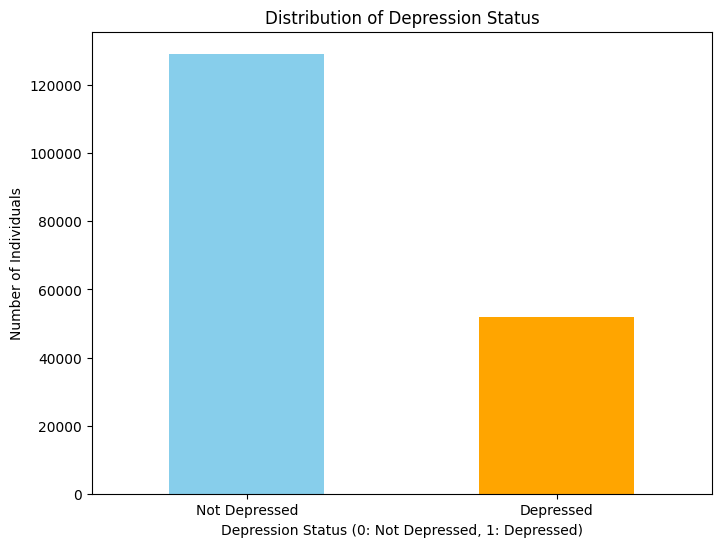

In [ ]:
# Count the number of people in each depression category
depression_counts = df_retired_clean['depression_status'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
depression_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Depression Status')
plt.xlabel('Depression Status (0: Not Depressed, 1: Depressed)')
plt.ylabel('Number of Individuals')
plt.xticks(ticks=[0, 1], labels=['Not Depressed', 'Depressed'], rotation=0)
plt.show()

In [ ]:
depression_counts

depression_status
0    129216
1     51785
Name: count, dtype: int64

### Gender distribution

In [ ]:
# Finding the gender of the individuals in the dataset
gender_counts = df_retired_clean['gender'].value_counts()
depressed_gender_counts = df_retired_clean[df_retired_clean['depression_status'] == 1]['gender'].value_counts()

# Pie chart for gender ratio
fig_gender_ratio = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title='Gender Distribution in Dataset',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig_gender_ratio.show()

# Pie chart for depressed individuals by gender
fig_depressed_gender_ratio = px.pie(
    names=depressed_gender_counts.index,
    values=depressed_gender_counts.values,
    title='Gender Distribution Among Depressed Individuals',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig_depressed_gender_ratio.show()

### Depression counts by country

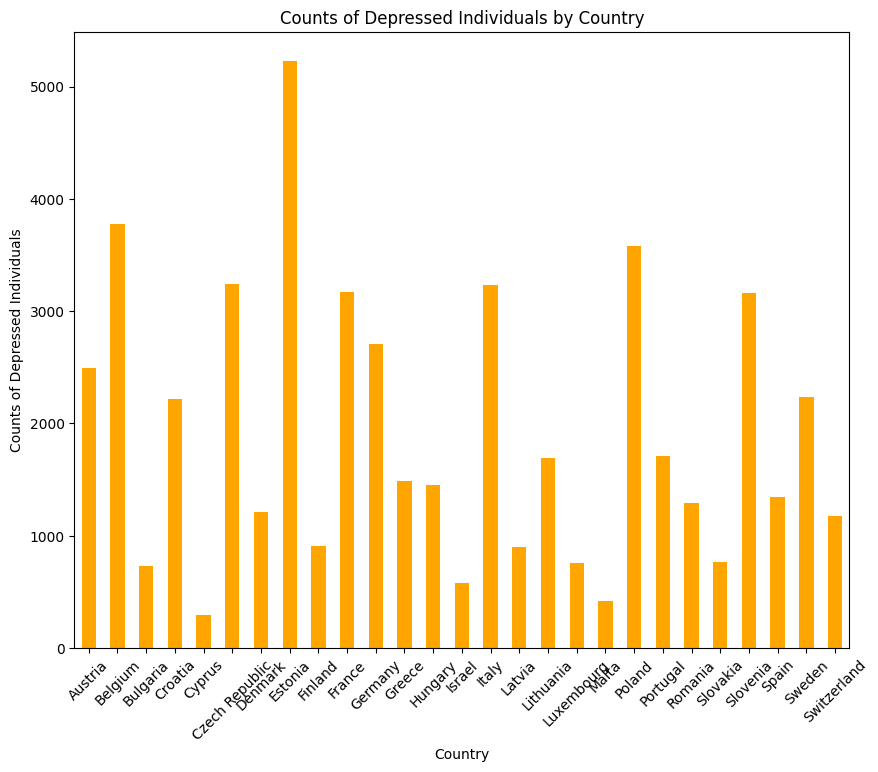

In [ ]:
# Group by 'country' and 'depression_status' and count the occurrences
depression_by_country = df_retired_clean.groupby('country')['depression_status'].value_counts().unstack(fill_value=0)

# We are interested in the counts of depressed individuals (depression_status == 1)
depressed_counts_by_country = depression_by_country[1]

import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 8))
depressed_counts_by_country.plot(kind='bar', color='orange')
plt.title('Counts of Depressed Individuals by Country')
plt.xlabel('Country')
plt.ylabel('Counts of Depressed Individuals')
plt.xticks(rotation=45)  # Rotate country names for better visibility
plt.show()

In [ ]:
# Finding the number of depressed people in each country
depressed_counts_by_country = df_retired_clean[df_retired_clean['depression_status'] == 1].groupby('country').size().reset_index(name='count')

# Plotting the data using Plotly Express
fig = px.choropleth(depressed_counts_by_country,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth",
                    title="Depressed Individuals by Country in Europe")
fig.show()

# Group by country and calculate the total number of individuals and the number of depressed individuals
country_stats = df_retired_clean.groupby('country').agg(
    total_individuals=('depression_status', 'size'),  # Count of all individuals per country
    depressed_count=('depression_status', lambda x: (x == 1).sum())  # Count of depressed individuals
).reset_index()
# Calculate the percentage of depressed individuals
country_stats['percentage_depressed'] = (country_stats['depressed_count'] / country_stats['total_individuals']) * 100

# Display the final auxiliary table
print(country_stats)

# Plotting the data using Plotly Express
fig = px.choropleth(
    country_stats,  # your DataFrame
    locations="country",  # column in DataFrame with country names
    locationmode='country names',  # set to match the names in the 'country' column
    color="percentage_depressed",  # column to display color based on
    hover_name="country",  # column to show in the tooltip
    hover_data={
        'total_individuals': True,
        'depressed_count': True,
        'percentage_depressed': ':.2f'  # format hover data display
    },
    color_continuous_scale=px.colors.sequential.Viridis,  # color scale
    title="Percentage of Depressed Individuals by Country"
)

# Show the figure
fig.show()

           country  total_individuals  depressed_count  percentage_depressed
0          Austria              10162             2491             24.512891
1          Belgium              12719             3777             29.695731
2         Bulgaria               2365              735             31.078224
3          Croatia               8337             2216             26.580305
4           Cyprus               1260              296             23.492063
5   Czech Republic              11380             3245             28.514938
6          Denmark               6601             1214             18.391153
7          Estonia              13097             5225             39.894632
8          Finland               3125              912             29.184000
9           France               9468             3172             33.502324
10         Germany              10554             2705             25.630093
11          Greece               8229             1485             18.045935

### Depression counts by age

In [ ]:
# Identifing the depressed people
depressed_individuals = df_retired_clean[df_retired_clean['depression_status'] == 1]

# Create a histogram to visualize the number of depressed individuals by age
fig = px.histogram(
    depressed_individuals,
    x='age',
    nbins=20,
    title='Distribution of Depressed Individuals by Age',
    labels={'age': 'Age of Individuals'},  # labels for axes
    template='plotly_dark'  # optional styling
)

# Update layout if necessary
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count of Depressed Individuals',
    bargap=0.2  # Gap between bars
)

# Show the plot
fig.show()

# Create a histogram to visualize the distribution of ages
fig = px.histogram(
    df_retired_clean,
    x='age',
    nbins=20,
    title='Distribution of Individuals by Age',
    labels={'age': 'Age'},
    template='plotly_dark',
    color_discrete_sequence=['indianred']
)

# Additional layout customization
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count of Individuals",
    bargap=0.2
)

# Show the plot
fig.show()

### Number of depressed people by marital status

In [ ]:
# Group by 'mstat' and calculate counts for depression status
mstat_stats = df_retired_clean.groupby('mstat')['depression_status'].agg(
    total_individuals='count',
    depressed_count=lambda x: (x == 1).sum()
).reset_index()

# Calculate the percentage of depressed individuals
mstat_stats['percentage_depressed'] = (mstat_stats['depressed_count'] / mstat_stats['total_individuals']) * 100
mstat_stats['percentage_depressed'] = mstat_stats['percentage_depressed'].round(2)

# Create a bar chart to visualize the percentage of depressed individuals by marital status
fig = px.bar(
    mstat_stats,
    x='mstat',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Marital Status',
    labels={'mstat': 'Marital Status', 'percentage_depressed': '% Depressed'},
    color='mstat',
    template='plotly_dark'
)

# Improve plot aesthetics
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_layout(
    xaxis_title="Marital Status",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, mstat_stats['percentage_depressed'].max() + 10])
)

# Show the plot
fig.show()

### Number of depressed people by level of self-perceived health and number of chronic diseases

In [ ]:
# Group by 'sphus' (perceived health status) and calculate counts for depression status
health_stats = df_retired_clean.groupby('sphus')['depression_status'].agg(
    total_individuals='count',
    depressed_count=lambda x: (x == 1).sum()
).reset_index()

# Calculate the percentage of depressed individuals
health_stats['percentage_depressed'] = (health_stats['depressed_count'] / health_stats['total_individuals']) * 100
health_stats['percentage_depressed'] = health_stats['percentage_depressed'].round(2)

# Create a bar chart to visualize the percentage of depressed individuals by perceived health
fig = px.bar(
    health_stats,
    x='sphus',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Perceived Health Status',
    labels={'sphus': 'Perceived Health Status', 'percentage_depressed': '% Depressed'},
    color='sphus',
    template='plotly_dark'
)

# Improve plot aesthetics
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_layout(
    xaxis_title="Perceived Health Status",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, health_stats['percentage_depressed'].max() + 10])
)

# Show the plot
fig.show()

In [ ]:
# Convert 'chronic' to a numeric column
df_retired_clean['chronic'] = pd.to_numeric(df_retired_clean['chronic'], errors='coerce')

# Define bins for the number of chronic diseases
bins = [0, 1, 3, 5, 7, 10, float('inf')]
labels = ['0', '1-2', '3-4', '5-6','7-9', '>=10']

# Bin the 'chronic' data
df_retired_clean['chronic_group'] = pd.cut(df_retired_clean['chronic'], bins=bins, labels=labels, right=False)

# Calculate counts for all and for depressed within each group
chronic_stats = df_retired_clean.groupby('chronic_group').agg(
    total_individuals=('chronic', 'size'),  # Count all individuals per group
    depressed_count=('depression_status', lambda x: (x == 1).sum())  # Count depressed individuals
).reset_index()

# Calculate the percentage of depressed individuals in each group compared to the whole dataset
chronic_stats['percentage_depressed'] = (chronic_stats['depressed_count'] / chronic_stats['total_individuals']) * 100
chronic_stats['percentage_depressed'] = chronic_stats['percentage_depressed'].round(2)


# Bar chart for percentage of depressed individuals with chronic diseases
# Plotting the percentage of depressed individuals by number of chronic diseases
fig = px.bar(
    chronic_stats,
    x='chronic_group',
    y='percentage_depressed',
    title='Percentage of Depressed Individuals by Number of Chronic Diseases',
    labels={'chronic_group': 'Number of Chronic Diseases', 'percentage_depressed': '% of Depressed Individuals'},
    color='chronic_group'  # Color coding the bars can help in quickly distinguishing the groups
)
fig.update_layout(
    xaxis_title="Groups of Chronic Diseases",
    yaxis_title="Percentage of Depressed Individuals",
    plot_bgcolor='white'
)
fig.show()

# Bar chart for count of depressed individuals with chronic diseases
fig_count = px.bar(
    chronic_stats,
    x='chronic_group',
    y='depressed_count',
    title='Count of Depressed Individuals by Number of Chronic Diseases',
    labels={'chronic_group': 'Number of Chronic Diseases', 'depressed_count': 'Count of Depressed Individuals'},
    color='chronic_group'
)
fig_count.update_layout(xaxis_title="Groups of Chronic Diseases", yaxis_title="Count of Depressed Individuals")
fig_count.show()

In [ ]:
# Filter the DataFrame for individuals with more than 10 chronic diseases who are depressed
depressed_with_many_diseases = df_retired_clean[(df_retired_clean['chronic'] >= 10) &
                                                     (df_retired_clean['depression_status'] == 1)]

# Calculate the number of such individuals
num_depressed_with_many_diseases = len(depressed_with_many_diseases)

print(f"Number of depressed individuals with more than 10 chronic diseases: {num_depressed_with_many_diseases}")

Number of depressed individuals with more than 10 chronic diseases: 137


In [ ]:
# Filter the DataFrame for individuals with more than 10 chronic diseases who are depressed
with_many_diseases = df_retired_clean[(df_retired_clean['chronic'] >= 10)]

# Calculate the number of such individuals
num_with_many_diseases = len(with_many_diseases)

print(f"Number of individuals with more than 10 chronic diseases: {num_with_many_diseases}")

Number of individuals with more than 10 chronic diseases: 185


### Depressed people by mobility limitations

In [ ]:
# Convert 'mobility' to numeric
df_retired_clean['mobility'] = pd.to_numeric(df_retired_clean['mobility'], errors='coerce')

# Define bins and labels for mobility limitations
bins = [0, 1, 3, 6, 10, float('inf')]  # The upper limit ensures inclusion of all higher values
labels = ['0', '1-2', '3-5', '6-9', '>=10']

# Bin the 'mobility' data into categories
df_retired_clean['mobility_group'] = pd.cut(df_retired_clean['mobility'], bins=bins, labels=labels, right=False)


# Group by 'mobility_group' and calculate depression stats
mobility_stats = df_retired_clean.groupby('mobility_group').agg(
    total_individuals=('depression_status', 'size'),
    depressed_count=('depression_status', lambda x: (x == 1).sum())
).reset_index()

# Calculate the percentage of depressed individuals in each group
mobility_stats['percentage_depressed'] = (mobility_stats['depressed_count'] / mobility_stats['total_individuals']) * 100
mobility_stats['percentage_depressed'] = mobility_stats['percentage_depressed'].round(2)
# Create a pie chart
fig = px.pie(
    mobility_stats,
    names='mobility_group',
    values='percentage_depressed',
    title='Percentage of Depressed Individuals by Mobility Limitation Level',
    color_discrete_sequence=px.colors.sequential.Viridis  # A visually pleasing color scheme
)

# Customize hover data to include both percentage and count
fig.update_traces(
    textinfo='label+percent',  # Show label and percentage on the chart
    hoverinfo='label+percent+value',  # Customize hover information
    hovertemplate='<b>%{label}</b><br>Depressed Count for this lvl: %{customdata[0]}<br>% of total for this lvl: %{value}%',
    customdata=mobility_stats[['depressed_count']]
)

# Enhance layout and aesthetics
fig.update_layout(
    legend_title_text='Mobility Limitation Levels'
)

# Show the plot
fig.show()

###Depressed people by years of education

In [ ]:
# Map 'Never went to school' to 0
df_retired_clean['yedu'] = df_retired_clean['yedu'].replace('Never went to school', 0)

# Convert 'yedu' to numeric
df_retired_clean['yedu'] = pd.to_numeric(df_retired_clean['yedu'], errors='coerce')

# Define bins and labels for grouping years of education
bins = [0, 1, 5, 9, 13, 19, 24, 30]  # Ends are exclusive, hence 30 to include up to 29
labels = ['0', '1-4', '5-8', '9-12', '13-18', '19-23', '24-29']

# Bin the years of education using pd.cut
df_retired_clean['education_group'] = pd.cut(df_retired_clean['yedu'], bins=bins, labels=labels, right=False)

# Group by new education groups and calculate counts for depression status
education_stats = df_retired_clean.groupby('education_group')['depression_status'].agg(
    total_individuals='count',
    depressed_count=lambda x: (x == 1).sum()
).reset_index()

# Calculate the percentage of depressed individuals
education_stats['percentage_depressed'] = (education_stats['depressed_count'] / education_stats['total_individuals']) * 100
education_stats['percentage_depressed'] = education_stats['percentage_depressed'].round(2)
# Create a bar chart to visualize the percentage of depressed individuals by grouped years of education
fig = px.bar(
    education_stats,
    x='education_group',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Grouped Years of Education',
    labels={'education_group': 'Grouped Years of Education', 'percentage_depressed': '% Depressed'},
    color='education_group',
    template='plotly_dark'
)

# Improve plot aesthetics
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_layout(
    xaxis_title="Grouped Years of Education",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, education_stats['percentage_depressed'].max() + 10])
)

# Show the plot
fig.show()

### By level of life satisfaction

In [ ]:
# Map 'Completely satisfied' to 10 and 'Completely dissatisfied' to 0
life_satisfaction_mapping = {
    'Completely satisfied': 10,
    'Completely dissatisfied': 0
}
df_retired_clean['lifesat'] = df_retired_clean['lifesat'].replace(life_satisfaction_mapping)

# Convert 'lifesat' to numeric, assuming other values are already appropriate numbers
df_retired_clean['lifesat'] = pd.to_numeric(df_retired_clean['lifesat'], errors='coerce')

# Define bins and labels for grouping life satisfaction
bins = [0, 3, 6, 9, 11]  # The bins define the range of values for each category
labels = ['0-2', '3-5', '6-8', '9-10']

# Bin the 'lifesat' data into categories
df_retired_clean['life_satisfaction_group'] = pd.cut(df_retired_clean['lifesat'], bins=bins, labels=labels, right=False)

# Calculate counts and percentage for each group
life_satisfaction_stats = df_retired_clean.groupby('life_satisfaction_group').agg(
    total_individuals=('depression_status', 'size'),  # Total individuals in each group
    depressed_count=('depression_status', lambda x: (x == 1).sum())  # Depressed individuals
).reset_index()

# Calculate the percentage of depressed individuals in each group
life_satisfaction_stats['percentage_depressed'] = (life_satisfaction_stats['depressed_count'] / life_satisfaction_stats['total_individuals']) * 100
life_satisfaction_stats['percentage_depressed'] = life_satisfaction_stats['percentage_depressed'].round(2)

In [ ]:
# Create a bar chart to visualize the percentage of depressed individuals by life satisfaction group
fig = px.bar(
    life_satisfaction_stats,
    x='life_satisfaction_group',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Life Satisfaction Group',
    labels={'life_satisfaction_group': 'Life Satisfaction Group', 'percentage_depressed': '% Depressed'},
    color='life_satisfaction_group',
    template='plotly_white',
    hover_data={'depressed_count': True}
)

# Improve plot aesthetics
fig.update_traces(
    texttemplate='%{text:.2f}%'
)
fig.update_layout(
    xaxis_title="Life Satisfaction Group",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, life_satisfaction_stats['percentage_depressed'].max() + 10])
)

# Show the plot
fig.show()

### By happiness of life

In [ ]:
# Group by 'lifehap' and calculate depression stats
happiness_stats = df_retired_clean.groupby('lifehap').agg(
    total_individuals=('depression_status', 'size'),  # Total individuals in each happiness group
    depressed_count=('depression_status', lambda x: (x == 1).sum())  # Depressed individuals
).reset_index()

# Calculate the percentage of depressed individuals in each happiness group
happiness_stats['percentage_depressed'] = (happiness_stats['depressed_count'] / happiness_stats['total_individuals']) * 100
happiness_stats['percentage_depressed'] = happiness_stats['percentage_depressed'].round(2)

# Create a bar chart to visualize the percentage of depressed individuals by life happiness group
fig = px.bar(
    happiness_stats,
    x='lifehap',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Life Happiness',
    labels={'lifehap': 'Life Happiness', 'percentage_depressed': '% Depressed'},
    color='lifehap',  # Use different colors for each happiness level for better visual differentiation
    template='plotly_dark',  # Use a dark theme for better contrast
    hover_data={'depressed_count': True}  # Include depressed_count in the hover information
)

# Improve plot aesthetics
fig.update_traces(
    texttemplate='%{text:.2f}%'  # Format the percentage text on the bars
)
fig.update_layout(
    xaxis_title="Life Happiness",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, happiness_stats['percentage_depressed'].max() + 10])  # Adjust the y-axis range for better presentation
)

# Show the plot
fig.show()

## Preparing the data for modelling

In [ ]:
df_etc_clean=df_retired_clean.copy()

In [ ]:
# Define groups by European regions
regions = {
    'Northern Europe': ['Estonia', 'Denmark', 'Sweden', 'Finland', 'Latvia', 'Lithuania'],
    'Western Europe': ['Germany', 'Belgium', 'France', 'Switzerland', 'Austria', 'Luxembourg','Slovenia'],
    'Southern Europe': ['Italy', 'Greece', 'Spain', 'Portugal', 'Malta', 'Cyprus', 'Croatia', 'Israel'],
    'Eastern Europe': ['Poland', 'Czech Republic', 'Slovakia', 'Hungary', 'Romania', 'Bulgaria']
}

# Map each country to its region
country_to_region = {country: region for region, countries in regions.items() for country in countries}
df_etc_clean['region'] = df_etc_clean['country'].map(country_to_region)

In [ ]:
# One-hot encoding of regions
df_etc_clean = pd.get_dummies(df_etc_clean, columns=['region'])

import plotly.express as px

# Simple visualization of the count of individuals by region
region_counts = df_etc_clean.filter(regex='region_').sum().reset_index()
region_counts.columns = ['Region', 'Count']
region_counts['Region'] = region_counts['Region'].str.replace('region_', '')

fig = px.bar(region_counts, x='Region', y='Count', title='Count of Individuals by European Region')
fig.show()

In [ ]:
# Define the regions for aggregation
regions = ['region_Eastern Europe', 'region_Western Europe', 'region_Southern Europe', 'region_Northern Europe']

# Function to calculate depression stats by region
def calculate_region_stats(df, regions):
    region_stats_list = []
    for region in regions:
        region_data = df.groupby(region).agg(
            total_individuals=('depression_status', 'size'),  # Total individuals in each region
            depressed_count=('depression_status', lambda x: (x == 1).sum())  # Depressed individuals
        ).reset_index()
        region_data = region_data[region_data[region] == 1]  # Filter only rows where region is 1
        region_data['region'] = region  # Add region name
        region_data['percentage_depressed'] = (region_data['depressed_count'] / region_data['total_individuals']) * 100
        region_data['percentage_depressed'] = region_data['percentage_depressed'].round(2)
        region_stats_list.append(region_data[['region', 'percentage_depressed', 'depressed_count', 'total_individuals']])

    region_stats = pd.concat(region_stats_list, ignore_index=True)
    return region_stats

# Calculate region stats
region_stats = calculate_region_stats(df_etc_clean, regions)

# Replace one-hot encoded column names with readable region names
region_stats['region'] = region_stats['region'].replace({
    'region_Eastern Europe': 'Eastern Europe',
    'region_Western Europe': 'Western Europe',
    'region_Southern Europe': 'Southern Europe',
    'region_Northern Europe': 'Northern Europe'
})

# Define the order of regions
region_order = ["Eastern Europe", "Northern Europe", "Southern Europe", "Western Europe"]

# Create a bar chart to visualize the percentage of depressed individuals by region
fig = px.bar(
    region_stats,
    x='region',
    y='percentage_depressed',
    text='percentage_depressed',
    title='Percentage of Depressed Individuals by Region',
    labels={'region': 'Region', 'percentage_depressed': '% Depressed'},
    color='region',  # Use different colors for each region for better visual differentiation
    category_orders={'region': region_order},  # Ensure the bars are in the correct order
    template='plotly_dark',
    hover_data={'depressed_count': True, 'total_individuals': True}  # Include depressed_count and total_individuals in the hover information
)

# Customize the hover data to include the count of depressed and total individuals
fig.update_traces(
    texttemplate='%{text:.2f}%',
    hovertemplate="<b>%{x}</b><br>Depressed Count: %{customdata[0]}<br>Total Individuals: %{customdata[1]}<br>Percentage: %{y:.2f}%",
    customdata=region_stats[['depressed_count', 'total_individuals']]
)

# Improve plot aesthetics
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Percentage Depressed (%)",
    plot_bgcolor='white',
    yaxis=dict(range=[0, region_stats['percentage_depressed'].max() + 10])
)

# Show the plot
fig.show()

In [ ]:
# Loop through all columns and convert boolean columns to integers
for column in df_etc_clean.select_dtypes(include=['bool']).columns:
    df_etc_clean[column] = df_etc_clean[column].astype(int)

# Verify the changes for the specific columns you mentioned
print(df_etc_clean[['region_Eastern Europe', 'region_Northern Europe', 'region_Southern Europe', 'region_Western Europe']].head())

    region_Eastern Europe  region_Northern Europe  region_Southern Europe  \
10                      0                       0                       0   
11                      0                       0                       0   
12                      0                       0                       0   
13                      0                       0                       0   
14                      0                       0                       0   

    region_Western Europe  
10                      1  
11                      1  
12                      1  
13                      1  
14                      1  


In [ ]:
# Define the list of columns to drop
columns_to_drop = ['mergeid', 'hhid9', 'mergeidp9', 'coupleid9', 'country','cjs','language','eurod']

# Drop these columns from the DataFrame
df_etc_clean = df_etc_clean.drop(columns=columns_to_drop)

In [ ]:
#Function for One-Hot-Encoding
def one_hot_encoding(column_name:str,df):
    column_encoded=pd.get_dummies(df[column_name],prefix=column_name)
    column_encoded=column_encoded*1 #convert to 0 and 1
    df=df.join(column_encoded) #Join the encoded DF back to the original one
    df.drop(column_name,axis=1, inplace=True)
    return df

In [ ]:
# Perform one-hot encoding on 'otrf'
df_etc_clean=one_hot_encoding('otrf',df_etc_clean)

In [ ]:
# Define the mapping dictionary
yes_no_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'single' and 'couple' columns
df_etc_clean['single'] = df_etc_clean['single'].replace(yes_no_mapping)
df_etc_clean['couple'] = df_etc_clean['couple'].replace(yes_no_mapping)

# Convert 'single' and 'couple' columns to integer type
df_etc_clean['single'] = df_etc_clean['single'].astype(int)
df_etc_clean['couple'] = df_etc_clean['couple'].astype(int)

In [ ]:
male_female_mapping={'Male': 1, 'Female': 0}
# Apply the mapping to the 'gender' column
df_etc_clean['gender'] = df_etc_clean['gender'].replace(male_female_mapping)
df_etc_clean['gender'] = df_etc_clean['gender'].astype(int)

In [ ]:
df_etc_clean['age'] = df_etc_clean['age'].astype(int)
df_etc_clean['nchild'] = df_etc_clean['nchild'].astype(int)
df_etc_clean['ngrchild'] = df_etc_clean['ngrchild'].astype(int)

In [ ]:
sphs_mapping={'Poor':0, 'Fair':1, 'Good':2,'Very good':3, 'Excellent':4}

# Apply the mapping to the 'sphus' column
df_etc_clean['sphus'] = df_etc_clean['sphus'].replace(sphs_mapping)
df_etc_clean['sphus'] = df_etc_clean['sphus'].astype(int)

In [ ]:
# Perform one-hot encoding on 'mstat'
df_etc_clean=one_hot_encoding('mstat',df_etc_clean)

In [ ]:
# Apply the mapping to the 'gali' column
limitation_mapping = {'Limited': 1, 'Not limited': 0}
df_etc_clean['gali'] = df_etc_clean['gali'].replace(limitation_mapping)
df_etc_clean['gali'] = df_etc_clean['gali'].astype(int)

In [ ]:
# Apply the mapping to the 'hospital' column
df_etc_clean['hospital'] = df_etc_clean['hospital'].replace(yes_no_mapping)
# Convert the 'hospital' column to integer type
df_etc_clean['hospital'] = df_etc_clean['hospital'].astype(int)

In [ ]:
# Apply the mapping to the 'lifehap' column
lifehap_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes':2, 'Often':3}
df_etc_clean['lifehap'] = df_etc_clean['lifehap'].replace(lifehap_mapping)
df_etc_clean['lifehap'] = df_etc_clean['lifehap'].astype(int)

In [ ]:
# Convert the 'te_' columns to integer types
df_etc_clean['te_leisure'] = df_etc_clean['te_leisure'].astype(int)
df_etc_clean['te_children'] = df_etc_clean['te_children'].astype(int)
df_etc_clean['te_parents'] = df_etc_clean['te_parents'].astype(int)
df_etc_clean['te_partner'] = df_etc_clean['te_partner'].astype(int)
df_etc_clean['te_family'] = df_etc_clean['te_family'].astype(int)
df_etc_clean['te_pwork'] = df_etc_clean['te_pwork'].astype(int)
df_etc_clean['te_vwork'] = df_etc_clean['te_vwork'].astype(int)
df_etc_clean['te_pwork'] = df_etc_clean['te_pwork'].astype(int)
df_etc_clean['te_nap'] = df_etc_clean['te_nap'].astype(int)
df_etc_clean['te_sleep'] = df_etc_clean['te_sleep'].astype(int)

In [ ]:
# Convert the 'naly' column to integer type
df_etc_clean['naly'] = df_etc_clean['naly'].astype(int)

In [ ]:
#Map values in 'saly' column
saly_mapping={'Completely satisfied':10,'Completely dissatisfied':0}
df_etc_clean['saly'] = df_etc_clean['saly'].replace(saly_mapping)
df_etc_clean['saly'] = df_etc_clean['saly'].astype(int)

In [ ]:
# Map and convert the columns with the big 5 personalities
def map_and_convert(df, column_name):
    # Map values to 1 if they are 'High' or >= 2.5, otherwise to 0
    df[column_name] = df[column_name].apply(lambda x: 1 if x == 'High' or (isinstance(x, float) and x >= 2.5) else 0)

    # Convert the column to int
    df[column_name] = df[column_name].astype(int)

# List of Big 5 personality trait columns
trait_columns = ['bfi10_extra', 'bfi10_agree', 'bfi10_consc', 'bfi10_neuro', 'bfi10_open']

# Apply the function to each column
for column in trait_columns:
    map_and_convert(df_etc_clean, column)

In [ ]:
# Define the list of columns to drop
columns_to_drop = ['chronic_group','mobility_group','education_group',
                   'life_satisfaction_group',]
# Drop these columns from the DataFrame
df_etc_clean = df_etc_clean.drop(columns=columns_to_drop)

In [ ]:
#Check to see if everything is represented as numbers
df_etc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181001 entries, 10 to 347229
Data columns (total 53 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   single                                 181001 non-null  int64  
 1   couple                                 181001 non-null  int64  
 2   ydip                                   181001 non-null  float64
 3   yind                                   181001 non-null  float64
 4   thinc2                                 181001 non-null  float64
 5   thinc                                  181001 non-null  float64
 6   thexp                                  181001 non-null  float64
 7   hnetw                                  181001 non-null  float64
 8   hnfass                                 181001 non-null  float64
 9   gender                                 181001 non-null  int64  
 10  age                                    181001 non-null  int6

## Building the model and training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Split the dataset into features (X) and target (y)
X = df_etc_clean.drop(columns=['depression_status'])
y = df_etc_clean['depression_status']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define a neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 512),  # Increase layer size
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),  # Reduce dropout
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),  # Reduce dropout
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),  # Reduce dropout
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = NeuralNetwork()

The loss function used is Binary Cross-Entropy Loss, suitable for binary classification tasks. The optimizer chosen is Adam with a learning rate of 0.0001, which helps in adjusting the weights effectively during training.

In [ ]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=52, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=128, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

During each epoch, the model is set to training mode, and the optimizer updates the model parameters to minimize the loss. Predictions are made and compared with the actual labels to compute accuracy, F1 score, and recall. The model is then evaluated on the validation set. If the validation loss improves, it is recorded. If not, a patience counter is incremented, and training stops if the validation loss does not improve for a specified number of epochs. This ensures the model does not overfit and stops training once performance no longer improves on the validation set.

In [ ]:
# Training function with accuracy and F1 score calculation
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=7):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    train_f1_scores = []
    val_f1_scores = []
    train_recalls = []
    val_recalls = []

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_labels_train = []
        all_preds_train = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = (outputs > 0.5).float()
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            all_labels_train.extend(labels.cpu().numpy())
            all_preds_train.extend(predicted.cpu().numpy())

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_f1 = f1_score(all_labels_train, all_preds_train)
        train_recall = recall_score(all_labels_train, all_preds_train)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_f1_scores.append(train_f1)
        train_recalls.append(train_recall)

        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_labels_val = []
        all_preds_val = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs).squeeze()
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                predicted = (outputs > 0.5).float()
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                all_labels_val.extend(labels.cpu().numpy())
                all_preds_val.extend(predicted.cpu().numpy())

        val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        val_f1 = f1_score(all_labels_val, all_preds_val)
        val_recall = recall_score(all_labels_val, all_preds_val)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)
        val_recalls.append(val_recall)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train Recall: {train_recall:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val Recall: {val_recall:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    return train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores, train_recalls, val_recalls

In [ ]:
# Train the model
train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores, train_recalls, val_recalls = train_model(model, train_loader, val_loader, criterion, optimizer)

Epoch 1/100, Train Loss: 0.5532, Train Accuracy: 0.7370, Train F1: 0.5779, Train Recall: 0.6290, Val Loss: 0.4977, Val Accuracy: 0.7777, Val F1: 0.5950, Val Recall: 0.5709
Epoch 2/100, Train Loss: 0.4881, Train Accuracy: 0.7729, Train F1: 0.5713, Train Recall: 0.5289, Val Loss: 0.4606, Val Accuracy: 0.7875, Val F1: 0.5823, Val Recall: 0.5176
Epoch 3/100, Train Loss: 0.4653, Train Accuracy: 0.7805, Train F1: 0.5600, Train Recall: 0.4883, Val Loss: 0.4475, Val Accuracy: 0.7894, Val F1: 0.5630, Val Recall: 0.4742
Epoch 4/100, Train Loss: 0.4550, Train Accuracy: 0.7862, Train F1: 0.5656, Train Recall: 0.4866, Val Loss: 0.4422, Val Accuracy: 0.7938, Val F1: 0.5872, Val Recall: 0.5127
Epoch 5/100, Train Loss: 0.4486, Train Accuracy: 0.7905, Train F1: 0.5756, Train Recall: 0.4965, Val Loss: 0.4379, Val Accuracy: 0.7993, Val F1: 0.5903, Val Recall: 0.5056
Epoch 6/100, Train Loss: 0.4427, Train Accuracy: 0.7927, Train F1: 0.5807, Train Recall: 0.5018, Val Loss: 0.4311, Val Accuracy: 0.8006, Val

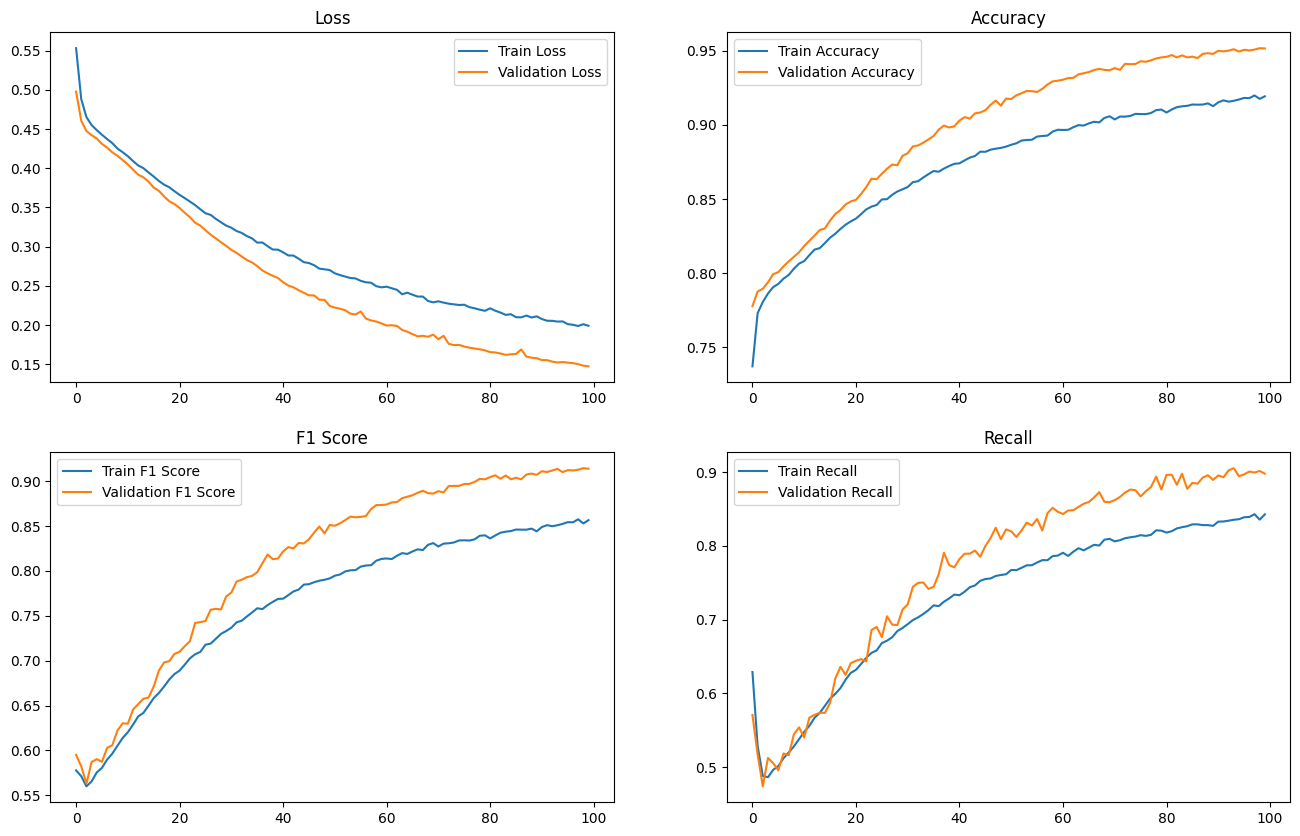

In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(train_f1_scores, label='Train F1 Score')
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.legend()
plt.title('F1 Score')

plt.subplot(2, 2, 4)
plt.plot(train_recalls, label='Train Recall')
plt.plot(val_recalls, label='Validation Recall')
plt.legend()
plt.title('Recall')

plt.show()

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt

In [ ]:
# Path to your Google Drive folder
drive_folder = '/content/drive/My Drive/NN project'

# Create directory if it doesn't exist
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)

In [ ]:
# Save the model
model_path = os.path.join(drive_folder, "model.pth")
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/NN project/model.pth


In [ ]:
import pickle

# Save the training history
history = {
    "train_losses": train_losses,
    "val_losses": val_losses,
    "train_accuracies": train_accuracies,
    "val_accuracies": val_accuracies,
    "train_f1_scores": train_f1_scores,
    "val_f1_scores": val_f1_scores,
    "train_recalls": train_recalls,
    "val_recalls": val_recalls
}

history_path = os.path.join(drive_folder, "training_history.pkl")
with open(history_path, 'wb') as f:
    pickle.dump(history, f)
print(f"Training history saved to {history_path}")

Training history saved to /content/drive/My Drive/NN project/training_history.pkl


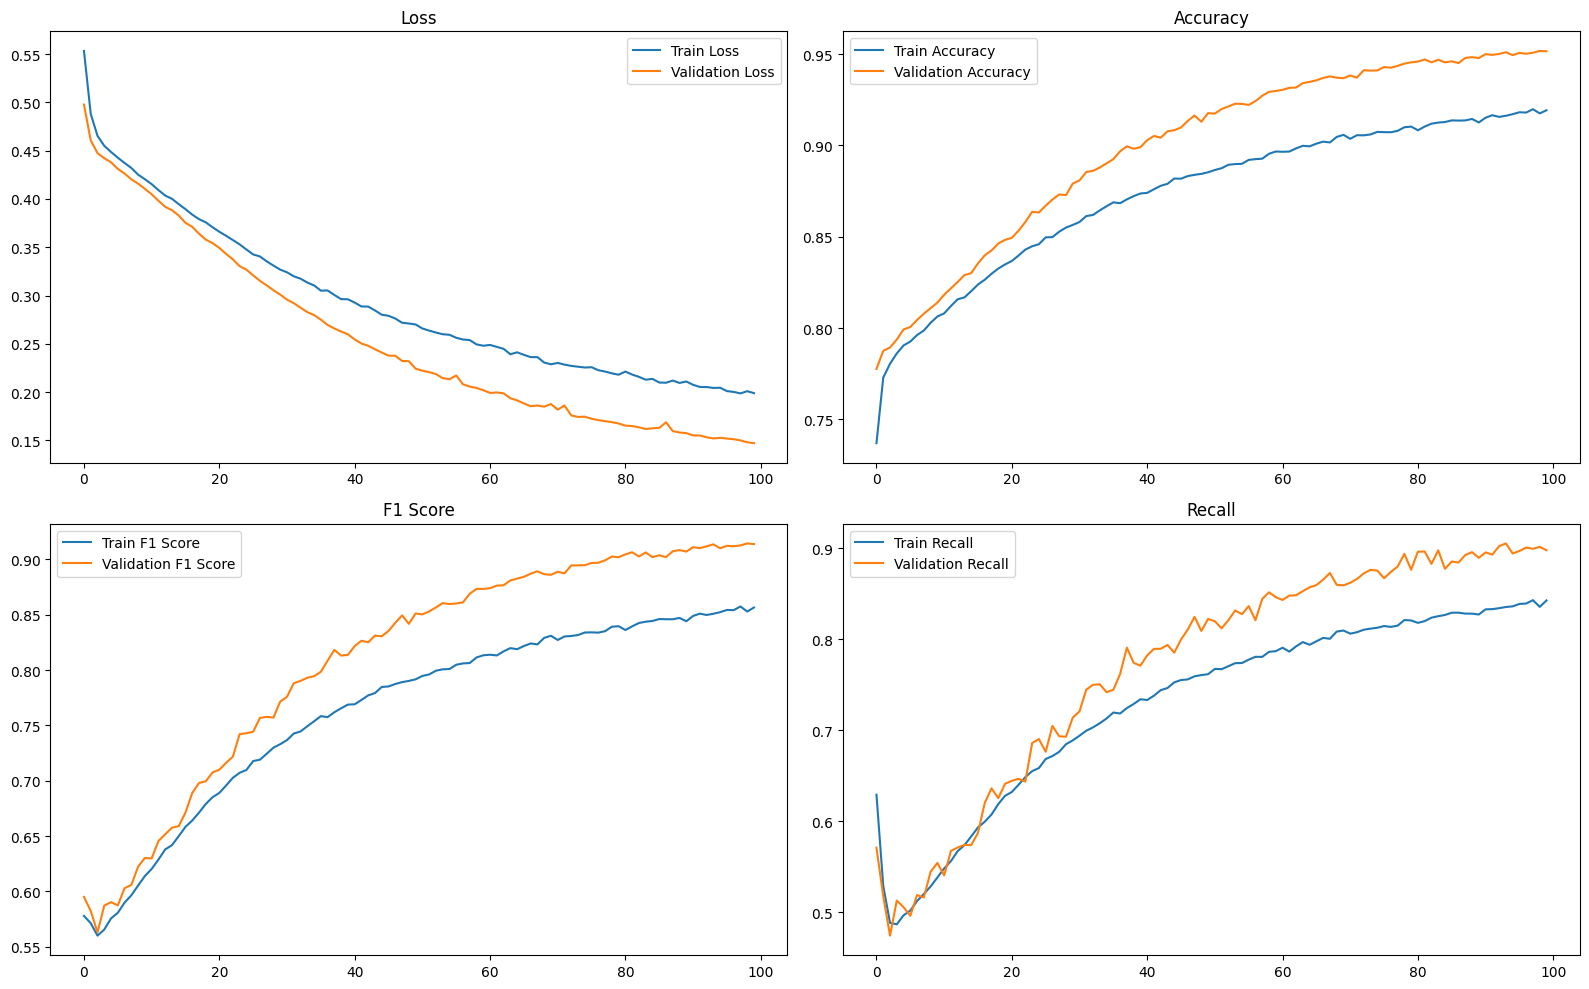

In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.savefig(os.path.join(drive_folder, 'loss_plot.png'))

plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.savefig(os.path.join(drive_folder, 'accuracy_plot.png'))

plt.subplot(2, 2, 3)
plt.plot(train_f1_scores, label='Train F1 Score')
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.legend()
plt.title('F1 Score')
plt.savefig(os.path.join(drive_folder, 'f1_score_plot.png'))

plt.subplot(2, 2, 4)
plt.plot(train_recalls, label='Train Recall')
plt.plot(val_recalls, label='Validation Recall')
plt.legend()
plt.title('Recall')
plt.savefig(os.path.join(drive_folder, 'recall_plot.png'))

plt.tight_layout()
plt.show()

## Model Evaluation

### Loading the saved model

In [ ]:
#Loading the saved model
from google.colab import drive
drive.mount('/content/drive')

# Path to the saved model in Google Drive
model_path = '/content/drive/My Drive/NN project/model.pth'

# Load the state dictionary
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

print("Model loaded successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully.


In [ ]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=52, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=128, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
import pickle

# Path to the training history in Google Drive
history_path = '/content/drive/My Drive/NN project/training_history.pkl'

# Load the training history
with open(history_path, 'rb') as f:
    history = pickle.load(f)

print("Training history loaded successfully.")

Training history loaded successfully.


An evaluation function is defined to assess the model's performance on the test set. The model is set to evaluation mode to ensure layers like dropout and batch normalization work in inference mode. The function uses torch.no_grad() to disable gradient calculation, which reduces memory consumption and speeds up computation during inference. The test data is processed in batches. For each batch, inputs and labels are moved to the appropriate device (CPU or GPU). The model makes predictions on the inputs, and the loss between the predictions and actual labels is calculated. Predictions are compared to actual labels to calculate the number of correct predictions. All labels and predictions are collected for further evaluation.


In [ ]:
# Evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()
    running_test_loss = 0.0
    correct = 0
    total = 0
    all_labels_test = []
    all_preds_test = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels_test.extend(labels.cpu().numpy())
            all_preds_test.extend(predicted.cpu().numpy())
    test_loss = running_test_loss / len(test_loader)
    accuracy = correct / total
    f1 = f1_score(all_labels_test, all_preds_test)
    recall = recall_score(all_labels_test, all_preds_test)
    return test_loss, accuracy, f1, recall

The results of the evaluation process are printed, which include the test loss, test accuracy, F1 score, and recall. These metrics give a comprehensive view of the model's performance on unseen data, ensuring that the model generalizes well and performs accurately in real-world scenarios. For instance, the model achieved a test loss of 0.1500, test accuracy of 0.9521, test F1 score of 0.9147, and test recall of 0.8980, indicating robust performance. This evaluation process ensures that the model's performance is thoroughly assessed, providing confidence in its ability to make accurate predictions on new data.


In [ ]:
test_loss, test_accuracy, test_f1, test_recall = evaluate_model(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f}, Test Recall: {test_recall:.4f}")
#Test Loss: 0.1500, Test Accuracy: 0.9521, Test F1: 0.9147, Test Recall: 0.8980

Test Loss: 0.1500, Test Accuracy: 0.9521, Test F1: 0.9147, Test Recall: 0.8980


In [ ]:
# history.update({
#     "test_loss": test_loss,
#     "test_accuracy": test_accuracy,
#     "test_f1": test_f1,
#     "test_recall": test_recall
# })

# # Save the updated history
# history_path = os.path.join(drive_folder, "training_history.pkl")
# with open(history_path, 'wb') as f:
#     pickle.dump(history, f)
# print(f"Updated training history saved to {history_path}")

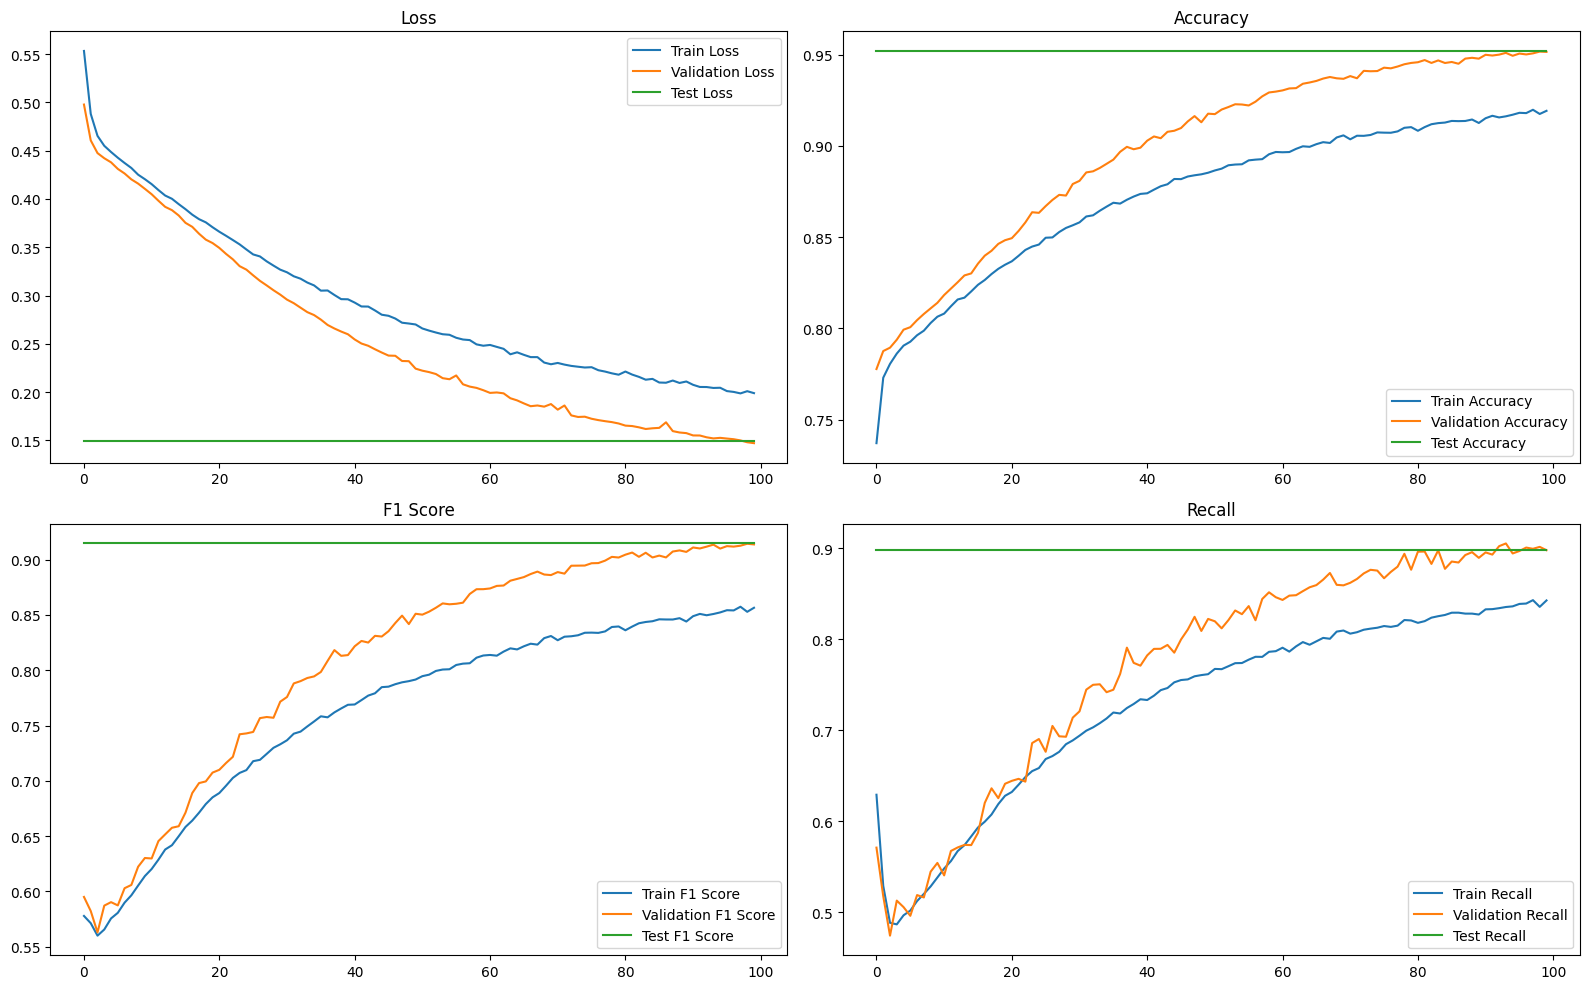

In [ ]:
# Extract test metrics
test_losses = [test_loss] * len(train_losses)
test_accuracies = [test_accuracy] * len(train_accuracies)
test_f1_scores = [test_f1] * len(train_f1_scores)
test_recalls = [test_recall] * len(train_recalls)

# Plot training, validation, and test metrics
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(train_f1_scores, label='Train F1 Score')
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.plot(test_f1_scores, label='Test F1 Score')
plt.legend()
plt.title('F1 Score')

plt.subplot(2, 2, 4)
plt.plot(train_recalls, label='Train Recall')
plt.plot(val_recalls, label='Validation Recall')
plt.plot(test_recalls, label='Test Recall')
plt.legend()
plt.title('Recall')

plt.tight_layout()
plt.savefig(os.path.join(drive_folder, 'comparison_plots.png'))
plt.show()

## Conclusion

The consistent placement of the training line above the validation line indicates that the model is likely underfitting the data. Underfitting occurs when the model's capacity is insufficient to capture the underlying complexities and patterns present in the dataset, however, in this situation it might have been influenced by factors such as the model's architecture or constraints imposed during training.

Future efforts should explore different batch sizes and model architectures to enhance performance. Increasing the batch size could potentially enable the model to learn more effectively from the training data, leading to improved outcomes. Additionally, experimenting with more complex architectures may help the model capture intricate patterns in the data, although this could increase the risk of overfitting to the training set. The objective would be to strike a balance where the model generalizes well to new data while maximizing its performance on the training set.
